In [1]:
import numpy as np
import random as Random
from matplotlib import pyplot as plt
from numpy import random as r
import pandas as pd

In [2]:
# Getting the data ready
df = pd.read_csv(r"C:\Users\DELL\Desktop\NISER\ML\data\Iris.csv")

df.drop(columns=df.columns[0], axis=1, inplace=True)
data = df.to_numpy()
np.random.shuffle(data)
Y = data[:,-1]
X = np.delete(data,-1,1)
X = X.astype(np.float64)
Y = Y.astype(np.float64)
# Separating into test/train (80-20)
sep = 0.8*len(X)-1
sep = int(sep)
trainx, testx = X[:sep,:], X[sep:,:]
trainy, testy = Y[:sep], Y[sep:]

In [3]:
# define functions
def perceptron(X,Y,epochs = 80,mode = 'vanilla'):
    col = len(X[0])
    w = np.zeros(col)
    b = 0
    N = len(X)
    c = []
    wl = []
    count = 0
    for epoch in range(epochs):
        for i in range(N):
            a = sum(w[j]*X[i][j] for j in range(col))+b
            if(Y[i]*a <= 0):
                w1 = np.append(w,b)
                wl.append(w1)
                c.append(count)
                count = -1
                for j in range(col):
                    w[j] += (Y[i]*X[i][j])
                    b += Y[i]
            count += 1
            if(epoch == epochs-1 and i == N-1): 
                w1 = np.append(w,b)
                wl.append(w1)
                c.append(count)
    if(mode == 'vanilla'):
        return(w,b)
    if(mode == 'averaged'):
        return(wl,c)

def acc(x,y,w = None,b = None, wl = None, c = None, mode = 'vanilla'):
    count = 0
    col = len(x[0])
    if(c != None):
        ctot = sum(c)
        c = np.divide(c,ctot)
    for i in range(len(x)):
        if(mode == 'vanilla'):
            pred = sum(w[j]*x[i][j] for j in range(col))+b
            
        if(mode == 'averaged'):
            pred = 0
            for k in range(len(c)):
                for j in range(col):
                    pred += c[k]*( (wl[k][j]*x[i][j]) + wl[k][-1])
                    
        act = y[i]
        if(pred*act>=0): count+=1
    return(count/len(x))

def plotarray(trainx,trainy,testx,testy):
    epochs = np.arange(1,81)
    van_acc = []
    ave_acc = []
    for epoch in epochs:
        w1,b1 = perceptron(trainx,trainy,epochs = epoch)       
        van_acc.append(acc(testx,testy,w = w1,b = b1))
        
        w2,c2 = perceptron(trainx,trainy, mode = 'averaged')
        ave_acc.append(acc(testx,testy,wl = w2,c = c2,mode = 'averaged'))
    
    return(epochs,van_acc,ave_acc)

In [4]:
# Training the vanilla model
w1,b1 = perceptron(trainx,trainy,epochs = 1)
print(w1,b1)
# Testing the accuracy
print(acc(testx,testy,w = w1,b = b1))

[ 0.4  4.8 -7.9 -3. ] 4.0
1.0


In [5]:
# Training the averaged model
w2,c2 = perceptron(trainx,trainy, mode = 'averaged', epochs = 1)
print(w2[-1],c2)
# Testing the accuracy
print(acc(testx,testy,wl = w2,c = c2,mode = 'averaged'))

[ 0.4  4.8 -7.9 -3.   4. ] [0, 1, 3, 0, 8, 0, 3, 97]
1.0


In [8]:
# Creating arrays to make plots
x, van, ave = plotarray(trainx,trainy,testx,testy)

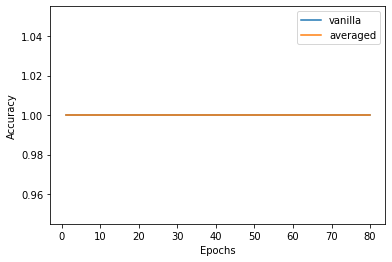

In [14]:
# Plotting
plt.plot(x,van, label = 'vanilla')
plt.plot(x,ave, label = 'averaged')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Both are bang on 1 in the very 1st epoch